In [ ]:
# http://www2.informatik.uni-freiburg.de/~cziegler/BX/

## Book crossing dataset (2004)
Collected by Cai-Nicolas Ziegler in a 4-week crawl (August / September 2004) from the Book-Crossing community with kind permission from Ron Hornbaker, CTO of Humankind Systems. Contains 278,858 users (anonymized but with demographic information) providing 1,149,780 ratings (explicit / implicit) about 271,379 books.

In [ ]:
!wget http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip

--2022-01-19 17:14:15--  http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip
Resolving www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)... 132.230.105.133
Connecting to www2.informatik.uni-freiburg.de (www2.informatik.uni-freiburg.de)|132.230.105.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘BX-CSV-Dump.zip.1’

BX-CSV-Dump.zip.1    62%[===========>        ]  15.47M  12.6MB/s               ^C


In [ ]:
!unzip BX-CSV-Dump.zip

Archive:  BX-CSV-Dump.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BX-Books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace BX-Users.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
book_ratings = pd.read_csv("BX-Book-Ratings.csv",sep=';', encoding='latin-1',low_memory=False)
books = pd.read_csv("BX-Books.csv", sep=';', encoding='latin-1',low_memory=False, error_bad_lines=False)
users = pd.read_csv("BX-Users.csv", sep=';', encoding='latin-1',low_memory=False)
print(book_ratings.head(5))

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\nSkipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\nSkipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [ ]:
print(book_ratings.shape)
print(books.shape)
print(users.shape)
books.head(5)

(1149780, 3)
(271360, 8)
(278858, 3)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head(5)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


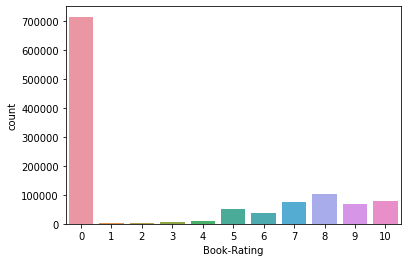

In [ ]:
ax = sns.countplot(x="Book-Rating", data=book_ratings)

In [ ]:
location = users.Location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']


In [ ]:
users_city=users.city.value_counts()[0:20].reset_index().rename(columns={'index':'city','city':'count'})

fig = go.Figure(go.Bar(
    x=users_city['city'],y=users_city['count'],
    marker={'color': users_city['count'], 
    'colorscale': 'Viridis'},  
    text=users_city['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 20 Users City',xaxis_title="City",yaxis_title="Count",title_x=0.5)
fig.show()

In [ ]:
# df_with_type = pd.merge(merged_df, dict_df, left_on="itemtype", right_on = "code")
isbn_name = books[["ISBN", "Book-Title"]]
isbn_author = books[["ISBN", "Book-Author"]]
df_book_name = pd.merge(book_ratings, isbn_name, left_on = "ISBN", right_on = "ISBN")
df_book_author = pd.merge(book_ratings, isbn_author, left_on = "ISBN", right_on = "ISBN")
df_book_name.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [ ]:
df_book_name=df_book_name["Book-Title"].value_counts()[0:10].reset_index().rename(columns={'index':'book_title','Book-Title':'count'})


colors=['cyan','royalblue','blue','darkblue',"darkcyan",'Brown','Coral','OrangeRed','SaddleBrown','Tomato']
fig = go.Figure([go.Pie(labels=df_book_name['book_title'], values=df_book_name['count'])])
fig.update_traces(hoverinfo='label+percent', textinfo='percent+value', textfont_size=15,
                 marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title="Most Reviewed Books ",title_x=0.3)
fig.show()

In [ ]:
df_author_name=df_book_author["Book-Author"].value_counts()[0:10].reset_index().rename(columns={'index':'book_author','Book-Author':'count'})

fig = go.Figure(go.Bar(
    x=df_author_name['book_author'],y=df_author_name['count'],
    marker={'color': df_author_name['count'], 
    'colorscale': 'cividis'},  
    text=df_author_name['count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Top 10 Reviewed Book Author',xaxis_title="Author",yaxis_title="Count",title_x=0.5)
fig.show()

##preparacion de datos

In [ ]:
# remove 0 ratings
book_ratings = book_ratings[book_ratings["Book-Rating"] != 0]
book_ratings.shape

(433671, 3)

In [ ]:
# Do we have enough ratings per user?
byuser = book_ratings.groupby("User-ID").count().sort_values("ISBN", ascending = False)
#has20ratings = (byuser["ISBN"] <= 50) & (byuser["ISBN"] >=20)
has20ratings = (byuser["ISBN"] <= 10) & (byuser["ISBN"] >=10)
users20ratings = byuser[has20ratings]
print(users20ratings.shape)
users20ratings.head()
print(users20ratings.columns.tolist())
userIDs = users20ratings.index
userIDs = userIDs.tolist()
print(userIDs)
#byuser = book_ratings.groupby("User-ID")["User-ID"].count().reset_index(name="count")

(679, 2)
['ISBN', 'Book-Rating']
[81434, 35081, 10965, 133905, 92486, 209830, 215923, 116090, 209394, 105535, 92869, 85944, 92674, 72163, 92696, 81459, 108563, 233361, 209389, 46541, 105335, 133682, 92637, 72296, 76259, 227886, 8660, 252598, 86093, 214042, 90134, 216476, 25792, 266808, 267120, 88605, 46295, 135473, 271066, 80692, 80912, 80929, 251890, 79340, 35144, 33832, 135329, 118229, 277710, 256925, 229412, 71568, 89093, 77114, 229673, 268639, 277051, 135799, 87579, 3418, 87690, 257187, 33681, 117318, 136011, 135996, 77332, 112709, 107208, 135902, 117577, 266872, 71207, 41718, 33633, 88066, 77307, 10570, 269031, 41157, 135296, 80684, 219013, 90423, 41103, 35532, 111888, 235375, 42352, 258556, 134302, 105987, 91023, 222207, 222210, 265932, 216795, 108213, 44320, 91425, 105840, 216495, 10917, 232583, 258550, 33270, 134694, 44334, 256892, 80996, 266580, 229358, 112199, 89493, 89634, 116433, 8255, 41842, 79747, 46345, 89917, 232736, 25996, 235394, 90075, 208936, 71884, 258520, 72418, 2

In [ ]:
boolean_series = book_ratings["User-ID"].isin(userIDs)
user_ratings = book_ratings[boolean_series]
print(user_ratings.shape)
user_ratings.head()

(6790, 3)


,User-ID,ISBN,Book-Rating
816,277051,0075536498,8
817,277051,0099287692,6
818,277051,0099845008,5
819,277051,0330262130,10
820,277051,0385720920,10


In [ ]:
isuser = book_ratings["User-ID"] == 11676
ey = book_ratings.filter(like = "11676", axis = 1)
ey2 = book_ratings[isuser] 
ey2.shape

(13602, 3)

## algoritmo

Collaborative filtering based on items or users?
items = cuando hay mas usuarios que items
usuarios = cuando hay mas items que usuarios(?
Similarity score based approaches do work even with binary dimension (bought/not bought)
We could use this for seattle library (records only show taken books, not rating)

https://realpython.com/build-recommendation-engine-collaborative-filtering/

https://stackoverflow.com/questions/58997762/recommendation-engine-without-ratings

Bayesian sets
ALS


In [ ]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623246 sha256=79fc801752a098c3108641cb39f05eedaeea78e7443502b1e6b8a887ebd91f90
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans

In [ ]:
# pasar de pandas df a surprise

reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(user_ratings, reader)

In [ ]:
# recommender
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [ ]:
# training set

# se crasheo la ram, intentar solo con los usuarios con mas de 20 reviews

trainingSet = data.build_full_trainset()

algo.fit(trainingSet)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
prediction = algo.predict(277186, "0006543545")
print(prediction.est)

7.380854197349043


Buena predicción, la calificación que le dió 277186 a ese libro es de 7

In [ ]:
#evaluar con test data